In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap

df = pd.read_csv("Wine_dataset.csv")
y,X = df.iloc[:,0],df.iloc[:,1:]

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(X_train_std, y_train)

In [3]:
def plot_decision_regions(X,y,classifier,test_idx=None, resolution=0.02):
    # setup marker generators and colormap
    markers=('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx1.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label = f'Class {cl}',
                    edgecolors='black') 

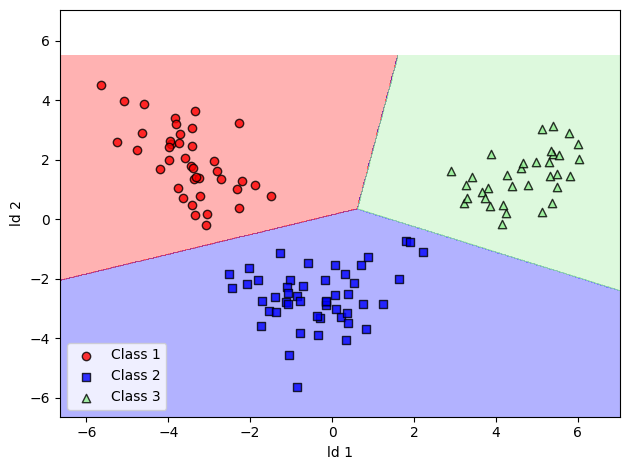

In [4]:
logreg = LogisticRegression(multi_class='ovr', random_state=42, solver='lbfgs')
logreg.fit(x_train_lda, y_train)
plot_decision_regions(x_train_lda, y_train, classifier=logreg)
plt.xlabel('ld 1')
plt.ylabel('ld 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


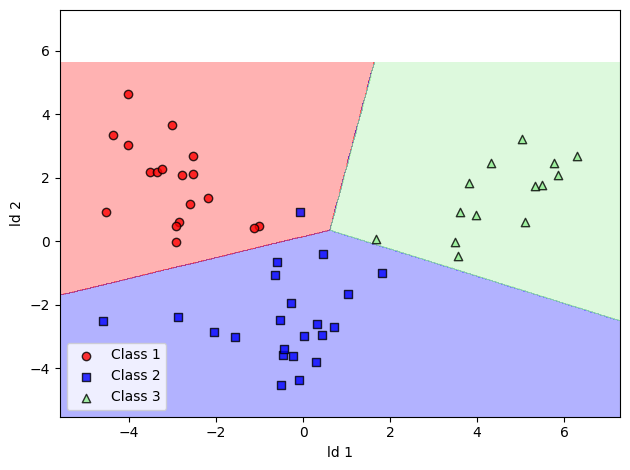

In [5]:
# let's look at the results of the test dataset
X_test_std = scalar.fit_transform(X_test)
x_test_lda = lda.transform(X_test_std)
plot_decision_regions(x_test_lda, y_test, classifier=logreg)
plt.xlabel('ld 1')
plt.ylabel('ld 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [6]:
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)


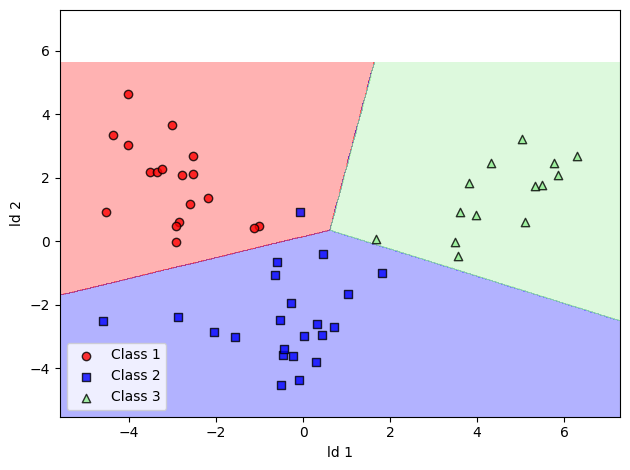

In [7]:
# Load the model from the file
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)


# let's look at the results of the test dataset by saved model
X_test_std = scalar.fit_transform(X_test)
x_test_lda = lda.transform(X_test_std)
plot_decision_regions(x_test_lda, y_test, classifier=model)
plt.xlabel('ld 1')
plt.ylabel('ld 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [8]:
# # Use the loaded model to make predictions
predictions = model.predict(x_test_lda)
predictions

array([1, 2, 1, 1, 1, 1, 3, 2, 2, 3, 2, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3,
       3, 3, 2, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1,
       1, 1, 2, 1, 3, 1, 2, 2, 3, 1])

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[18,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 14]])

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

